In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fer=pd.read_csv('/Users/tiagonascimento/spiced_projects/project_1/gapminder_total_fertility.csv',index_col=0)
df_life=pd.read_excel('/Users/tiagonascimento/spiced_projects/project_1/gapminder_lifeexpectancy.xlsx',index_col=0)
df_pop=pd.read_excel('/Users/tiagonascimento/spiced_projects/project_1/gapminder_population.xlsx',index_col=0)
df_continents=pd.read_csv('/Users/tiagonascimento/spiced_projects/project_1/continents.csv', sep=';',index_col=1)

In [3]:
df_fer.index.name="country"

In [4]:
df_fer.columns = df_fer.columns.astype(int)

In [5]:
df_life.index.name="country"

In [6]:
df_pop.index.name="country"

In [7]:
df_fer.reset_index(inplace=True)

In [8]:
df_fer_long = df_fer.melt(id_vars=['country'], var_name='Year', value_name='Fertility Rate')

In [9]:
df_fer_long

,country,Year,Fertility Rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [10]:
df_life.reset_index(inplace=True)
df_life_long=df_life.melt(id_vars=['country'], var_name='Year', value_name='Life Expectancy')
df_life_long

,country,Year,Life Expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82
...,...,...,...
56415,Yugoslavia,2016.0,NaN
56416,Zambia,2016.0,57.10
56417,Zimbabwe,2016.0,61.69
56418,Åland,2016.0,NaN


In [11]:
df_pop.reset_index(inplace=True)
df_pop_long=df_pop.melt(id_vars=['country'], var_name='Year', value_name='Population')
df_pop_long

,country,Year,Population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,410445.0
4,Algeria,1800.0,2503218.0
...,...,...,...
22270,Northern Marianas,2015.0,NaN
22271,South Georgia and the South Sandwich Islands,2015.0,NaN
22272,US Minor Outlying Islands,2015.0,NaN
22273,Virgin Islands,2015.0,NaN


In [12]:
df_gapminder = df_fer_long.merge(df_life_long, on=['country','Year'], how='left')
df_gapminder = df_gapminder.merge(df_pop_long, on=['country','Year'], how='left')
df_gapminder = df_gapminder.merge(df_continents, on=['country'], how='inner')
df_gapminder

,country,Year,Fertility Rate,Life Expectancy,Population,continent
0,Afghanistan,1800,7.00,28.21,3280000.0,Asia
1,Afghanistan,1801,7.00,28.20,NaN,Asia
2,Afghanistan,1802,7.00,28.19,NaN,Asia
3,Afghanistan,1803,7.00,28.18,NaN,Asia
4,Afghanistan,1804,7.00,28.17,NaN,Asia
...,...,...,...,...,...,...
37795,Zimbabwe,2011,3.64,51.60,14255592.0,Africa
37796,Zimbabwe,2012,3.56,54.20,14565482.0,Africa
37797,Zimbabwe,2013,3.49,55.70,14898092.0,Africa
37798,Zimbabwe,2014,3.41,57.00,15245855.0,Africa


In [13]:
df_gapminder.set_index("country", inplace=True)
df_gapminder

,Year,Fertility Rate,Life Expectancy,Population,continent
country,,,,,
Afghanistan,1800,7.00,28.21,3280000.0,Asia
Afghanistan,1801,7.00,28.20,NaN,Asia
Afghanistan,1802,7.00,28.19,NaN,Asia
Afghanistan,1803,7.00,28.18,NaN,Asia
Afghanistan,1804,7.00,28.17,NaN,Asia
...,...,...,...,...,...
Zimbabwe,2011,3.64,51.60,14255592.0,Africa
Zimbabwe,2012,3.56,54.20,14565482.0,Africa
Zimbabwe,2013,3.49,55.70,14898092.0,Africa


In [14]:
df_brazil=df_gapminder[df_gapminder.index=="Brazil"]
df_brazil

,Year,Fertility Rate,Life Expectancy,Population,continent
country,,,,,
Brazil,1800,6.26,32.0,3639636.0,South America
Brazil,1801,6.26,32.0,NaN,South America
Brazil,1802,6.26,32.0,NaN,South America
Brazil,1803,6.26,32.0,NaN,South America
Brazil,1804,6.26,32.0,NaN,South America
...,...,...,...,...,...
Brazil,2011,1.82,73.8,200517584.0,South America
Brazil,2012,1.81,74.0,202401584.0,South America
Brazil,2013,1.80,74.1,204259377.0,South America


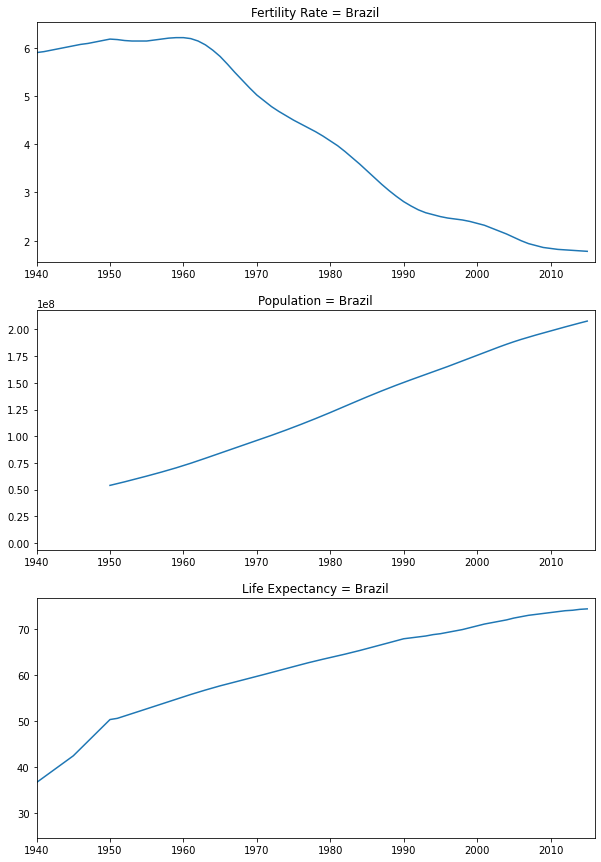

In [50]:

fig, ax = plt.subplots(3, 1, figsize=(10, 15));

ax[0].plot(df_brazil['Year'], df_brazil['Fertility Rate'])
ax[0].set_xlim([1940, 2016]);
ax[0].set(title = "Fertility Rate = Brazil");

ax[2].plot(df_brazil['Year'], df_brazil['Life Expectancy'])
ax[2].set_xlim([1940, 2016]);
ax[2].set(title = "Life Expectancy = Brazil");

ax[1].plot(df_brazil['Year'], df_brazil['Population'])
ax[1].set_xlim([1940, 2016]);
ax[1].set(title = "Population = Brazil");
#sns.lineplot(df=df_brazil, x='Year', y='Population', ax=ax[1])
#sns.lineplot(df=df_brazil, x='Year', y='Life Expectancy', ax=ax[2])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

i=1960
fig=plt.figure(figsize=[12,4.8],dpi=160)


ax = df_gapminder.loc[df_gapminder['Year'] == i]
sns.scatterplot(x='Life Expectancy', y='Fertility Rate', hue='continent',
            size='Population', sizes=(40,600), data=ax, alpha=0.5)
plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.xlim([25, 87])
plt.ylim([1, 8]);
plt.title(i);
plt.tight_layout()

plt.plot()
filename='/Users/tiagonascimento/spiced_projects/Repository/garlic-boosting-student-code/tiago/01Project/Scatter Step/TEST'+str(i)+'.png'
plt.savefig(fname=filename,facecolor = 'white')
plt.show()

In [ ]:
for i in range(1960,2015):
    fig=plt.figure(figsize=[12,4.8],dpi=160)


    ax = df_gapminder.loc[df_gapminder['Year'] == i]
    sns.scatterplot(x='Life Expectancy', y='Fertility Rate', hue='continent',
            size='Population', sizes=(40,600), data=ax, alpha=0.6)
    plt.legend(loc=2, bbox_to_anchor=(1, 1))
    plt.xlim([25, 87])
    plt.ylim([1, 8]);
    plt.title(i);
    plt.tight_layout()

    plt.plot()
    filename='/Users/tiagonascimento/spiced_projects/Repository/garlic-boosting-student-code/tiago/01Project/Scatter Step/'+str(i)+'.png'
    plt.savefig(fname=filename,facecolor = 'white')
    plt.close()
    


In [59]:
import imageio

images = []
path = '/Users/tiagonascimento/spiced_projects/Repository/garlic-boosting-student-code/tiago/01Project/Scatter Step/'

for i in range(1960, 2015):
    filename = str(path)+str(i)+'.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output3.gif', images, fps=13)

![SegmentLocal](output4.gif "output4")